In [42]:
import pandas as pd
import sklearn.model_selection as skmod
import sklearn.linear_model as sklin
import sklearn.metrics as skmet
import matplotlib.pyplot as plt
%matplotlib inline

folder = 'Data/'
lasso = pd.read_csv(folder+'LASSO-data-set.csv')
lasso.info()
lasso.shape

dependent = 'score'

print(lasso.score[1:10])

X = lasso
y = lasso[dependent]
X.drop(dependent,axis=1,inplace=True)

X_train, X_test, y_train, y_test = skmod.train_test_split(X,y,test_size=.25,random_state=0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   strength      1000 non-null   int64  
 1   dexterity     1000 non-null   int64  
 2   constitution  1000 non-null   int64  
 3   wisdom        1000 non-null   int64  
 4   intelligence  1000 non-null   int64  
 5   charisma      1000 non-null   int64  
 6   weight        1000 non-null   int64  
 7   height        1000 non-null   int64  
 8   modifier1     1000 non-null   int64  
 9   modifier2     1000 non-null   int64  
 10  modifier3     1000 non-null   int64  
 11  modifier4     1000 non-null   int64  
 12  modifier5     1000 non-null   int64  
 13  modifier6     1000 non-null   int64  
 14  modifier7     1000 non-null   int64  
 15  modifier8     1000 non-null   int64  
 16  score         1000 non-null   float64
dtypes: float64(1), int64(16)
memory usage: 132.9 KB
1    413.145270
2    510

In [43]:
mod = sklin.LassoCV().fit(X_train,y_train)
mod.alpha_

1.0749236577654113

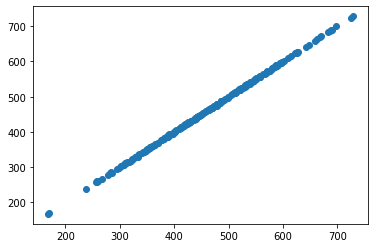

In [44]:
mod.score(X_test,y_test)

y_predict = mod.predict(X_test)

y_reserror = y_predict - y_test

plt.scatter(y_test,y_predict)


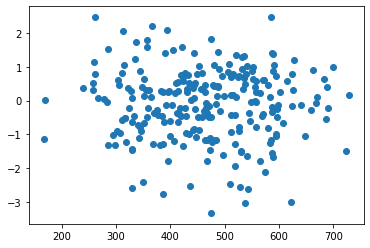

In [45]:
# plot residuals
plt.scatter(y_predict,y_reserror)

In [47]:
skmet.median_absolute_error(y_test,y_predict)


993   -1.642187
859   -1.493296
298    0.302245
553    0.088467
672    0.147930
         ...   
462   -0.942525
356   -0.902105
2      0.179026
478   -0.157831
695    0.799154
Name: score, Length: 250, dtype: float64
